# Linear regression using Python

# 1. Load and explore the data

In [187]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [188]:
# Load the CSV file(s) as reviews.
df_reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
df_reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [189]:
# View the metadata.
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [190]:
# Any missing values?
missing_values = df_reviews.isnull().sum()
print(missing_values)

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [191]:
# Explore the data.
df_reviews.groupby('age')['loyalty_points'].mean()

age
17     916.433333
18     827.062500
19    1311.600000
22     719.720000
23    1010.600000
24     869.500000
25     958.500000
26    1223.125000
27     893.600000
28    1521.750000
29    1972.190909
32    2739.518182
33    1698.650000
34    2711.263636
35    1937.000000
36    1759.600000
37    1820.800000
38    2110.538889
39    1925.562500
40    1051.350000
41    1301.833333
42     991.150000
43    1416.133333
44    1045.033333
45    1359.200000
46    1565.200000
49    1475.691667
50    1329.800000
51     701.900000
52     928.400000
53    1543.175000
54    2070.300000
55    1727.600000
56    1125.000000
57     580.300000
58    1138.375000
62    1156.900000
65    1237.600000
66     350.600000
67    1104.900000
68    1679.150000
69    1208.650000
70    1497.200000
71    1032.000000
72    1263.800000
Name: loyalty_points, dtype: float64

In [192]:
# Explore the data.
df_reviews.groupby('age')['spending_score (1-100)'].mean()

age
17    55.900000
18    45.425000
19    62.800000
22    44.460000
23    58.820000
24    62.200000
25    54.350000
26    67.250000
27    39.366667
28    54.550000
29    63.336364
32    69.763636
33    62.837500
34    61.972727
35    52.900000
36    43.200000
37    62.511111
38    52.711111
39    45.437500
40    24.500000
41    35.900000
42    22.600000
43    39.633333
44    30.966667
45    34.816667
46    42.900000
49    45.066667
50    41.750000
51    29.350000
52    36.600000
53    43.250000
54    55.500000
55    34.200000
56    30.400000
57    22.250000
58    37.650000
62    42.066667
65    40.650000
66    19.200000
67    41.700000
68    46.200000
69    41.200000
70    50.866667
71    52.000000
72    49.450000
Name: spending_score (1-100), dtype: float64

In [193]:
# Explore the data.
unique_education_values = df_reviews['education'].unique()
print(unique_education_values)

['graduate' 'PhD' 'diploma' 'postgraduate' 'Basic']


In [194]:
# Descriptive statistics.
summary_stats = df_reviews.describe()
print(summary_stats)

               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000  


# 2. Drop columns

In [195]:
# Drop unnecessary columns.
df_reviews = df_reviews.drop(['language', 'platform'], axis=1)

# View column names.
df_reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


# 3. Rename columns

In [196]:
# Rename the column headers.
df_reviews = df_reviews.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'})

# View column names.
df_reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


# 4. Save the DataFrame as a CSV file

In [197]:
# Create a CSV file as output.
df_reviews.to_csv('turtle_cleaned_reviews.csv', index=False)

In [198]:
# Import new CSV file with Pandas.
cleaned_reviews = pd.read_csv('turtle_cleaned_reviews.csv')

# View the DataFrame.
cleaned_reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


# 5. Linear regression

### 5a) spending vs loyalty

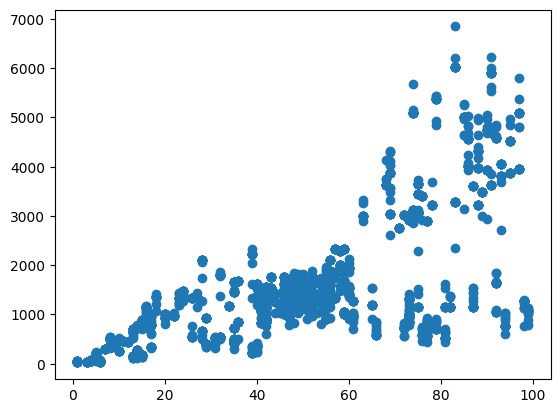

In [199]:
# Independent variable.
X = cleaned_reviews['spending_score']

# Dependent variable.
y = cleaned_reviews['loyalty_points']

# Check for linearity.
plt.scatter(X,y)

In [200]:
# OLS model and summary.
# Add a constant term (intercept) to the model
X = sm.add_constant(X)

# Create the OLS model
model = sm.OLS(y, X).fit()

# Get the summary of the OLS model
summary = model.summary()

# Print the summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          2.92e-263
Time:                        18:09:57   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -75.0527     45.931     -1.

In [201]:
# Extract the estimated parameters.
params = model.params 

# Extract the standard errors.
std_errors = model.bse

# Extract the predicted values.
predicted_values = model.predict(X)

In [202]:
# Set the X coefficient and the constant to generate the regression table.
regression_table = model.summary()

# View the output.
print(regression_table)

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          2.92e-263
Time:                        18:10:01   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -75.0527     45.931     -1.

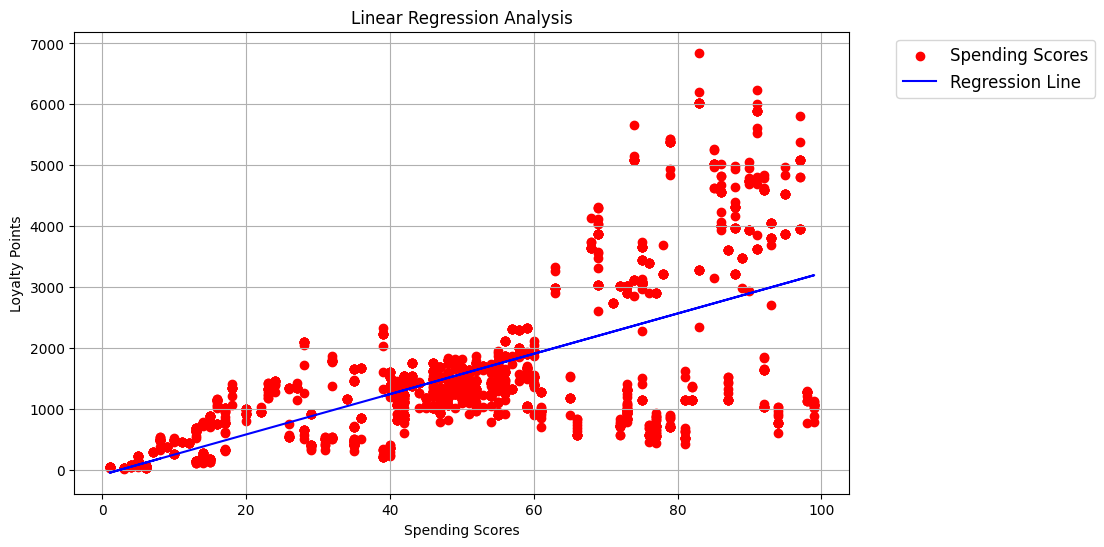

In [203]:
# figure size 
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(cleaned_reviews['spending_score'], cleaned_reviews['loyalty_points'], label='Spending Scores', color='red')

# Plot the regression line for spending_scores
plt.plot(cleaned_reviews['spending_score'], predicted_values, label='Regression Line', color='blue', linestyle='-')

plt.xlabel('Spending Scores')
plt.ylabel('Loyalty Points')
plt.legend(loc='upper left', fontsize=12, frameon=True, bbox_to_anchor=(1.05, 1))  # Move the legend outside
plt.grid(True)
plt.title('Linear Regression Analysis')

plt.show()

### 5b) renumeration vs loyalty

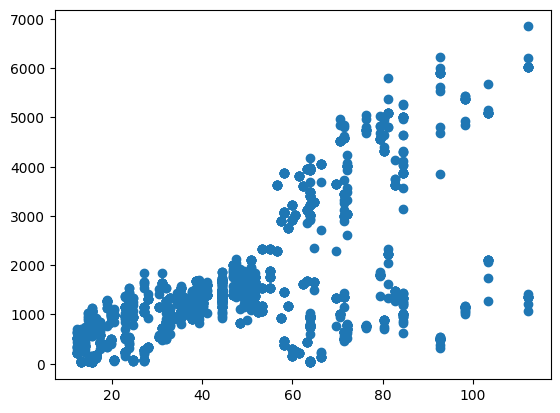

In [204]:
# Independent variable.
X = cleaned_reviews['remuneration']

# Dependent variable.
y = cleaned_reviews['loyalty_points']

# Check for linearity.
plt.scatter(X,y)

In [205]:
# OLS model and summary.
# Add a constant term (intercept) to the model
X = sm.add_constant(X)

# Create the OLS model
model = sm.OLS(y, X).fit()

# Get the summary of the OLS model
summary = model.summary()

# Print the summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          2.43e-209
Time:                        18:10:10   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -65.6865     52.171     -1.259   

In [206]:
# Extract the estimated parameters.
params = model.params 

# Extract the standard errors.
std_errors = model.bse

# Extract the predicted values.
predicted_values = model.predict(X)

In [207]:
# Set the X coefficient and the constant to generate the regression table.
regression_table = model.summary()

# View the output.
print(regression_table)

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          2.43e-209
Time:                        18:10:14   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -65.6865     52.171     -1.259   

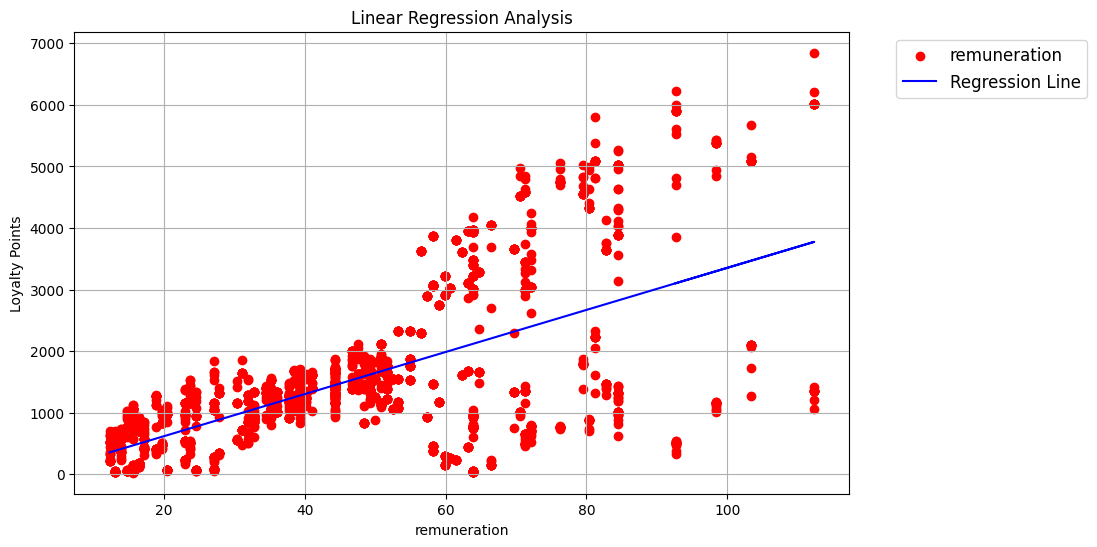

In [208]:
# figure size 
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(cleaned_reviews['remuneration'], cleaned_reviews['loyalty_points'], label='remuneration', color='red')

# Plot the regression line for remuneration
plt.plot(cleaned_reviews['remuneration'], predicted_values, label='Regression Line', color='blue', linestyle='-')

plt.xlabel('remuneration')
plt.ylabel('Loyalty Points')
plt.legend(loc='upper left', fontsize=12, frameon=True, bbox_to_anchor=(1.05, 1))  # Move the legend outside
plt.grid(True)
plt.title('Linear Regression Analysis')

plt.show()

### 5c) age vs loyalty

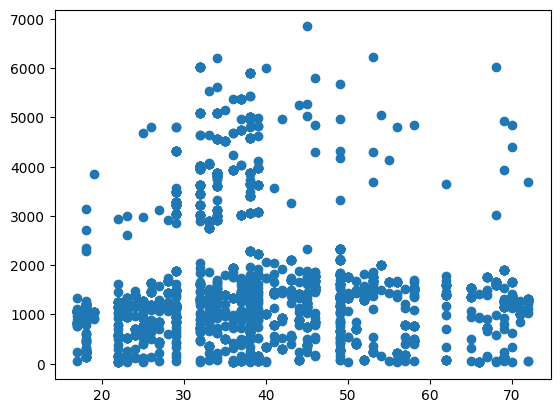

In [209]:
# Independent variable.
X = cleaned_reviews['age']

# Dependent variable.
y = cleaned_reviews['loyalty_points']

# Check for linearity.
plt.scatter(X,y)

In [210]:
# OLS model and summary.
# Add a constant term (intercept) to the model
X = sm.add_constant(X)

# Create the OLS model
model = sm.OLS(y, X).fit()

# Get the summary of the OLS model
summary = model.summary()

# Print the summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 02 Oct 2023   Prob (F-statistic):             0.0577
Time:                        18:10:21   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.0

In [211]:
# Extract the estimated parameters.
params = model.params 

# Extract the standard errors.
std_errors = model.bse

# Extract the predicted values.
predicted_values = model.predict(X)

In [212]:
# Set the X coefficient and the constant to generate the regression table.
regression_table = model.summary()

# View the output.
print(regression_table)

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 02 Oct 2023   Prob (F-statistic):             0.0577
Time:                        18:10:23   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.0

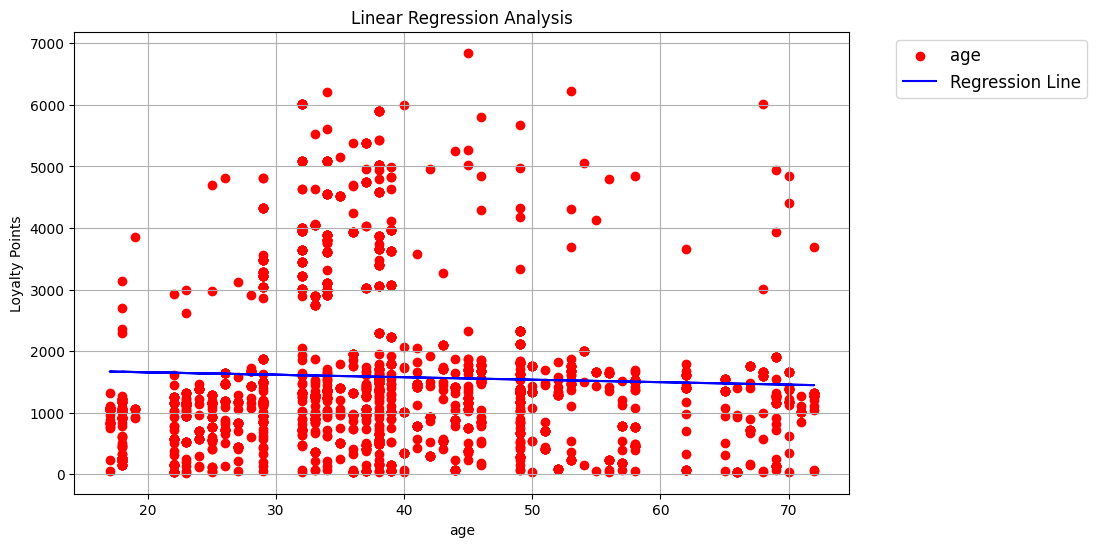

In [213]:
# figure size 
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(cleaned_reviews['age'], cleaned_reviews['loyalty_points'], label='age', color='red')

# Plot the regression line for remuneration
plt.plot(cleaned_reviews['age'], predicted_values, label='Regression Line', color='blue', linestyle='-')

plt.xlabel('age')
plt.ylabel('Loyalty Points')
plt.legend(loc='upper left', fontsize=12, frameon=True, bbox_to_anchor=(1.05, 1))  # Move the legend outside
plt.grid(True)
plt.title('Linear Regression Analysis')

plt.show()

# Clustering with k-means using Python

# 1. Load and explore the data

In [214]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [215]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('turtle_cleaned_reviews.csv')

# View the DataFrame.
df2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [216]:
# Drop unnecessary columns.
columns_to_drop = ['gender', 'age', 'loyalty_points', 'education', 'product', 'review', 'summary']
df2 = df2.drop(columns=columns_to_drop)

# View DataFrame.
df2.head()

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [217]:
# Descriptive statistics.
descriptive_stats = df2.describe()
print(descriptive_stats)

       remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000


# 2. Plot

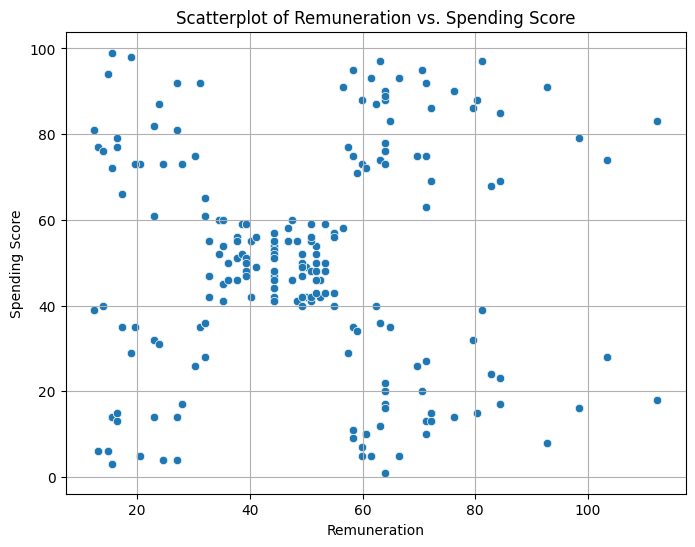

In [218]:
# Create a scatterplot using Seaborn.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='remuneration', y='spending_score')
plt.title('Scatterplot of Remuneration vs. Spending Score')
plt.xlabel('Remuneration')
plt.ylabel('Spending Score')
plt.grid(True)
plt.show()

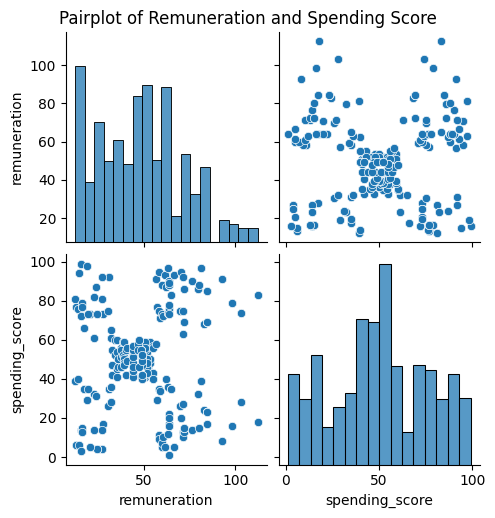

In [219]:
# Create a pairplot using Seaborn.
sns.pairplot(data=df2, vars=['remuneration', 'spending_score'])
plt.suptitle('Pairplot of Remuneration and Spending Score', y=1.02)
plt.show()

# 3. Elbow and silhoutte methods

In [220]:
# Determine the number of clusters: Elbow method.
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df2[['remuneration', 'spending_score']])
    inertias.append(kmeans.inertia_)

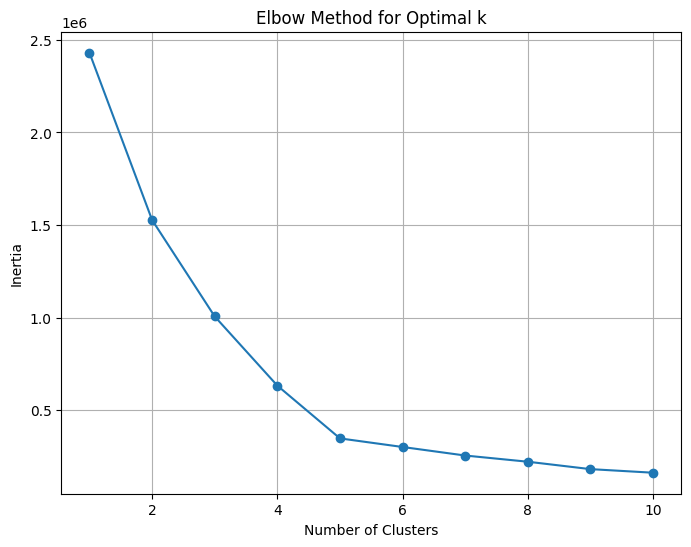

In [119]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [120]:
# Determine the number of clusters: Silhouette method.
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df2[['remuneration', 'spending_score']])
    score = silhouette_score(df2[['remuneration', 'spending_score']], kmeans.labels_)
    silhouette_scores.append(score)

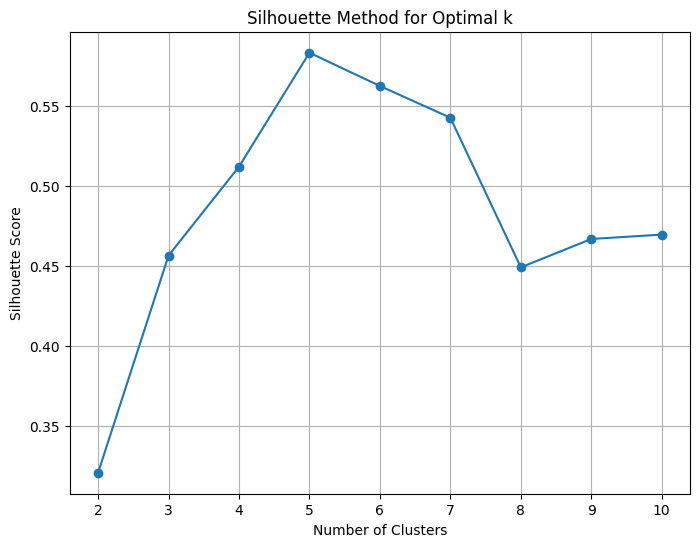

In [121]:
# Plot the Silhouette Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# 4. Evaluate k-means model at different values of k

In [221]:
# Different values of k
k_values = [2, 3, 4]
kmeans_models = {}
cluster_labels = {}

In [222]:
# Fitting k-means for different k values and storing the models and cluster labels
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df2[['remuneration', 'spending_score']])
    kmeans_models[k] = kmeans
    cluster_labels[k] = kmeans.labels_

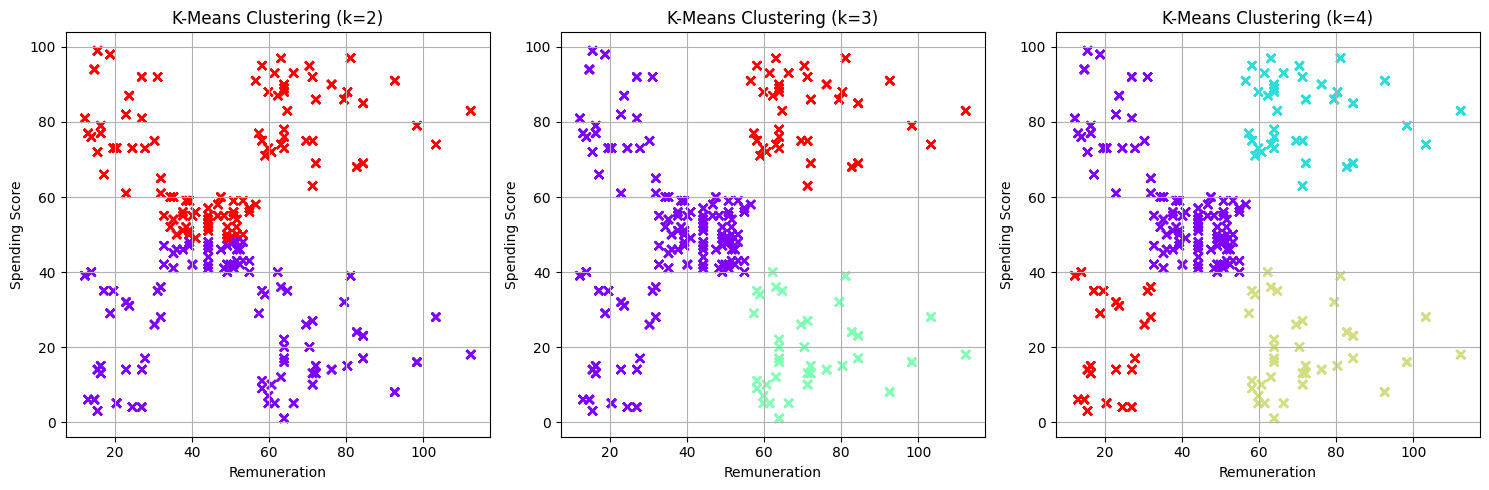

In [223]:
# Plotting the clusters for different k values
plt.figure(figsize=(15, 5))

for i, k in enumerate(k_values):
    plt.subplot(1, 3, i+1)
    plt.scatter(df2['remuneration'], df2['spending_score'], c=cluster_labels[k], cmap='rainbow', marker='x')
    plt.title(f'K-Means Clustering (k={k})')
    plt.xlabel('Remuneration')
    plt.ylabel('Spending Score')
    plt.grid(True)

plt.tight_layout()
plt.show()

# 5. Fit final model and justify your choice

In [224]:
# Apply the final model.
final_k = 3
final_kmeans = KMeans(n_clusters=final_k, random_state=0).fit(df2[['remuneration', 'spending_score']])

# View the output
final_kmeans.cluster_centers_, final_kmeans.labels_[:10]

(array([[34.13242073, 49.72312452],
        [73.93549858, 18.55555556],
        [73.2402809 , 82.00842697]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32))

In [228]:
# Check the number of observations per predicted class.
df2['cluster'] = final_kmeans.labels_
cluster_counts = df2['cluster'].value_counts().sort_index()

# View the output
print(cluster_counts)

cluster
0    1293
1     351
2     356
Name: count, dtype: int64


# 6. Plot and interpret the clusters

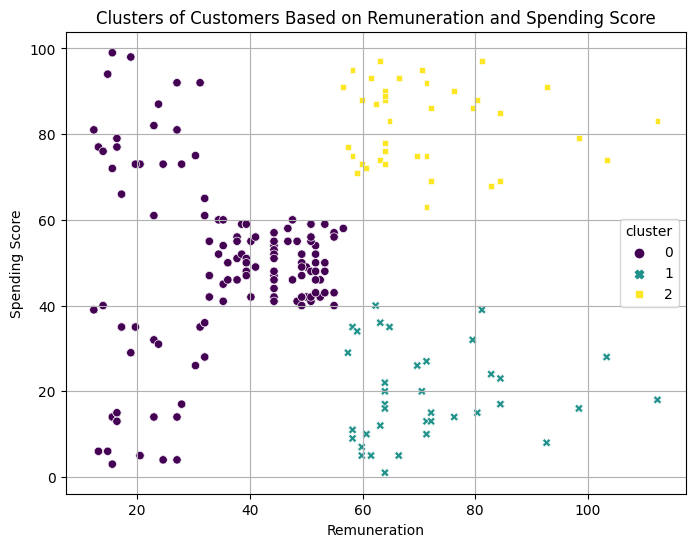

In [133]:
# Visualising the clusters.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='remuneration', y='spending_score', hue='cluster', palette='viridis', style='cluster')
plt.title('Clusters of Customers Based on Remuneration and Spending Score')
plt.xlabel('Remuneration')
plt.ylabel('Spending Score')
plt.grid(True)
plt.show()

In [134]:
# View the DataFrame.
print("Number of observations per cluster:")
print(cluster_counts)

Number of observations per cluster:
cluster
0    1293
1     351
2     356
Name: count, dtype: int64


In [135]:
# Analyzing characteristics of each cluster
cluster_analysis = df2.groupby('cluster')[['remuneration', 'spending_score']].mean()
print(cluster_analysis)

         remuneration  spending_score
cluster                              
0           34.132421       49.723125
1           73.935499       18.555556
2           73.240281       82.008427


# NLP using Python

In [37]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 750.3 kB/s eta 0:00:00a 0:00:01


In [39]:
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 1.6 MB/s eta 0:00:0000:0100:01


In [137]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [140]:
# Load the CSV file(s) as df3.
df3 = pd.read_csv('turtle_cleaned_reviews.csv')

# View the DataFrame.
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [141]:
# Drop unnecessary columns.
columns_to_drop = ['gender', 'age', 'remuneration', 'spending_score','loyalty_points', 'education', 'product']
df3 = df3.drop(columns=columns_to_drop)

# View DataFrame.
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [142]:
# Check for missing values
missing_values = df3.isnull().sum()
print(missing_values)

review     0
summary    0
dtype: int64


# 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [143]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].str.lower()
all_reviews = ' '.join(df3['review'])

In [144]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].str.lower()
all_reviews = ' '.join(df3['summary'])

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [74]:
# Replace all the punctuations in review column.
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply the remove_punctuation function to the 'Review' column
df3['review'] = df3['review'].apply(remove_punctuation)

# View output.
print(df3.head())

                                              review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9\n\nyour unpainted...   
2  nice art nice printing  why two panels are fil...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap  


In [75]:
# Replace all the puncuations in summary column.
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply the remove_punctuation function to the 'Review' column
df3['summary'] = df3['summary'].apply(remove_punctuation)

# View output.
print(df3.head())

                                              review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9\n\nyour unpainted...   
2  nice art nice printing  why two panels are fil...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap  


In [76]:
# Drop duplicates in both columns
df3.drop_duplicates(inplace=True)

# View the DataFrame
print(df3.head())

                                              review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9\n\nyour unpainted...   
2  nice art nice printing  why two panels are fil...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap  


# 3. Tokenise and create wordclouds

In [146]:
# Create new DataFrame (copy DataFrame).
df_tokenized = df3.copy()

# View DataFrame.
print(df_tokenized)

                                                 review  \
0     when it comes to a dm's screen, the space on t...   
1     an open letter to galeforce9*:\n\nyour unpaint...   
2     nice art, nice printing.  why two panels are f...   
3     amazing buy! bought it as a gift for our new d...   
4     as my review of gf9's previous screens these w...   
...                                                 ...   
1995  the perfect word game for mixed ages (with mom...   
1996  great game.  did not think i would like it whe...   
1997  great game for all.........\nkeeps the mind ni...   
1998                                          fun game!   
1999  this game is fun. a lot like scrabble without ...   

                                                summary  
0     the fact that 50% of this space is wasted on a...  
1     another worthless dungeon master's screen from...  
2                       pretty, but also pretty useless  
3                                            five stars  
4

In [147]:
# Apply tokenisation to both columns.
df_tokenized['review'] = df_tokenized['review'].apply(lambda x: x.split())
df_tokenized['summary'] = df_tokenized['summary'].apply(lambda x: x.split())

# View DataFrame
print(df_tokenized[['review', 'summary']].head())

                                              review  \
0  [when, it, comes, to, a, dm's, screen,, the, s...   
1  [an, open, letter, to, galeforce9*:, your, unp...   
2  [nice, art,, nice, printing., why, two, panels...   
3  [amazing, buy!, bought, it, as, a, gift, for, ...   
4  [as, my, review, of, gf9's, previous, screens,...   

                                             summary  
0  [the, fact, that, 50%, of, this, space, is, wa...  
1  [another, worthless, dungeon, master's, screen...  
2              [pretty,, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]  


In [229]:
# Review: Create a word cloud.
all_review_tokens = ' '.join(df_tokenized['review'].apply(lambda x: ' '.join(x)))
all_reviews = ' '.join([' '.join(review) for review in df_tokenized['review']])
wordcloud_reviews = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(all_reviews)

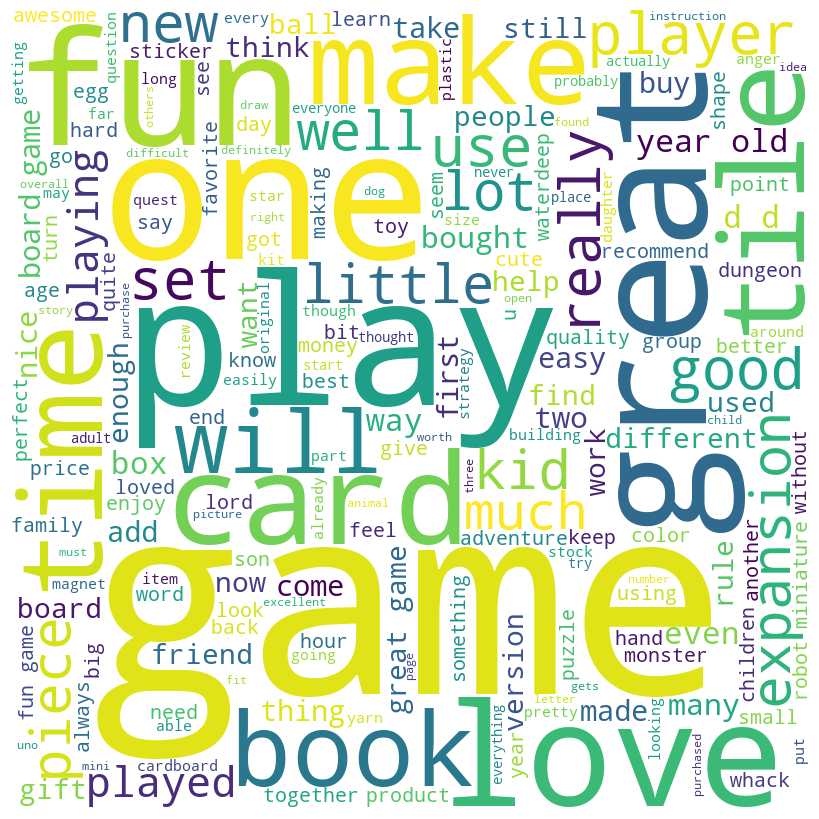

In [230]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_reviews) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [155]:
# Summary: Create a word cloud.
all_summaries = ' '.join([' '.join(summary) for summary in df_tokenized['summary']])
wordcloud_summary = WordCloud(width = 800, height = 800, 
                              background_color ='white', 
                              stopwords = None, 
                              min_font_size = 10).generate(all_summaries)

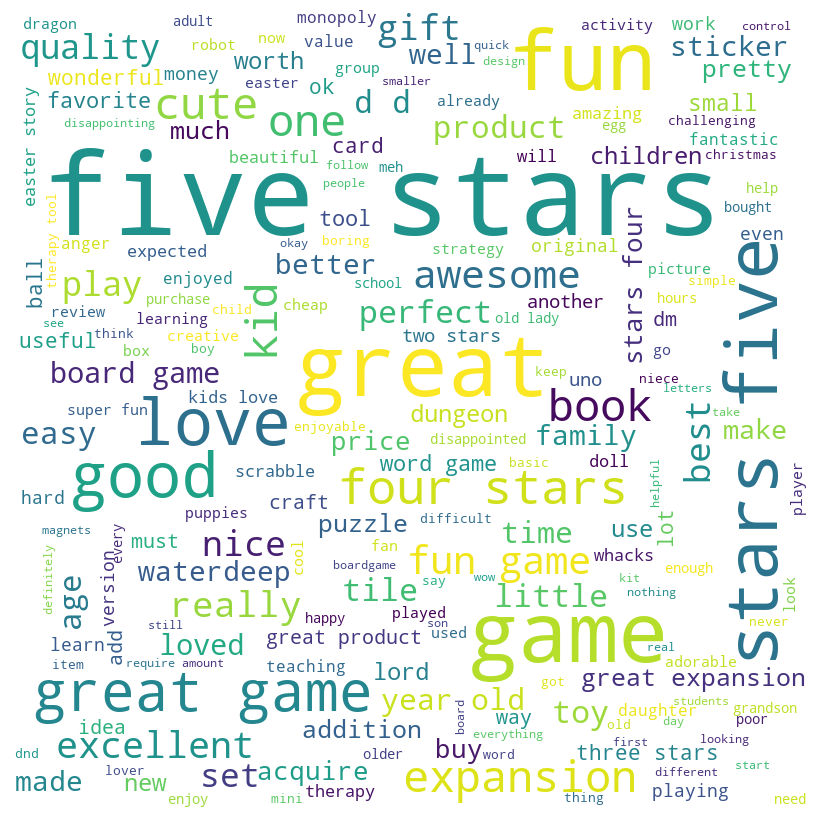

In [157]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_summary) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [162]:
# Determine the frequency distribution.
all_words = [word for review in df_tokenized['review'] for word in review]
freq_dist = FreqDist(all_words)

print(freq_dist.most_common(10))

[('the', 5438), ('and', 3194), ('to', 3148), ('a', 3144), ('of', 2480), ('i', 2069), ('is', 1751), ('it', 1727), ('this', 1690), ('for', 1526)]


In [164]:
# Determine the frequency distribution for the 'summary' column
all_words_summary = [word for summary in df_tokenized['summary'] for word in summary]
freq_dist_summary = FreqDist(all_words_summary)

# Print the most common words in summaries and their counts
print(freq_dist_summary.most_common(10))

[('stars', 466), ('five', 381), ('great', 278), ('the', 261), ('a', 237), ('game', 237), ('for', 230), ('to', 190), ('and', 167), ('fun', 165)]


### 4b) Remove alphanumeric characters and stopwords

In [239]:
# Remove alphanumeric words and stopwords
stop_words = set(stopwords.words('english'))
def clean_text(tokens):
    words = [word for word in tokens if word.isalpha()] 
    words = [word.lower() for word in words if word.lower() not in stop_words] 
    return words

# Apply the clean_text function to the 'summary' column
df_tokenized['cleaned_summary'] = df_tokenized['summary'].apply(clean_text)

# Print the cleaned text
print(df_tokenized[['cleaned_summary']].head())

                                     cleaned_summary
0  [fact, space, wasted, art, terribly, informati...
1              [another, worthless, dungeon, screen]
2                            [also, pretty, useless]
3                                      [five, stars]
4                                      [money, trap]


### 4c) Create wordcloud without stopwords

In [234]:
# Create a wordcloud without stop words.
cleaned_words_summary = [word for summary in df_tokenized['cleaned_summary'] for word in summary]
freq_dist_cleaned_summary = FreqDist(cleaned_words_summary)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate_from_frequencies(freq_dist_cleaned_summary)

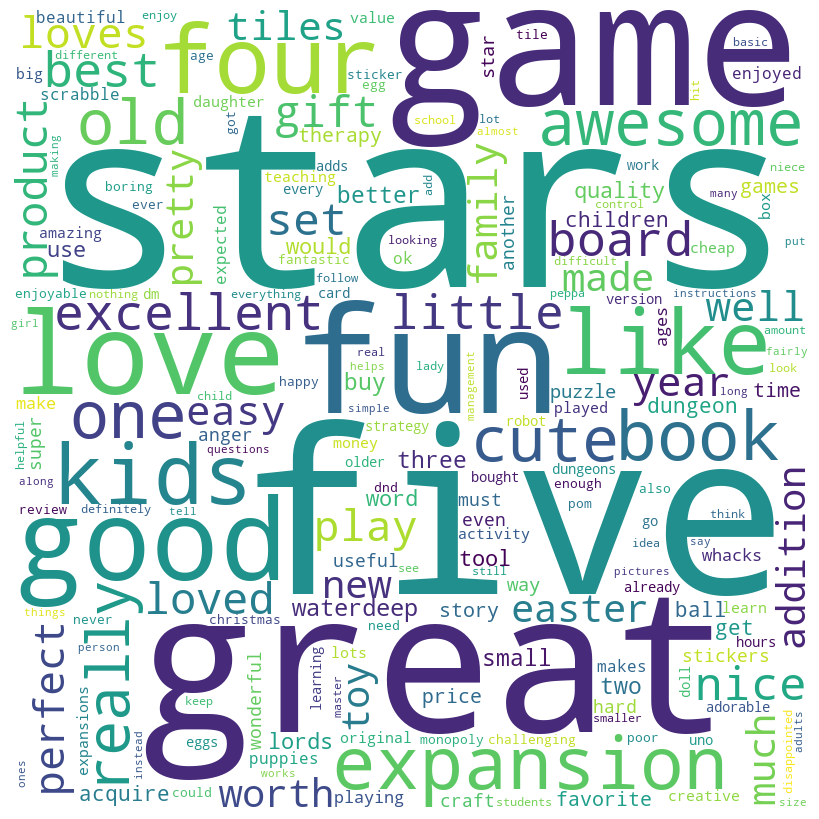

In [240]:
# Plot the wordcloud image.                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [241]:
# Get 15 most common words
common_words_summary = freq_dist_cleaned_summary.most_common(15)

# Print the most common words and their polarity
for word, freq in common_words_summary:
    polarity = TextBlob(word).sentiment.polarity
    print(f"Word: {word}, Frequency: {freq}, Polarity: {polarity:.2f}")

Word: stars, Frequency: 466, Polarity: 0.00
Word: five, Frequency: 381, Polarity: 0.00
Word: great, Frequency: 278, Polarity: 0.80
Word: game, Frequency: 237, Polarity: -0.40
Word: fun, Frequency: 165, Polarity: 0.30
Word: love, Frequency: 89, Polarity: 0.50
Word: good, Frequency: 87, Polarity: 0.70
Word: four, Frequency: 58, Polarity: 0.00
Word: like, Frequency: 52, Polarity: 0.00
Word: kids, Frequency: 45, Polarity: 0.00
Word: expansion, Frequency: 45, Polarity: 0.00
Word: book, Frequency: 40, Polarity: 0.00
Word: one, Frequency: 35, Polarity: 0.00
Word: awesome, Frequency: 33, Polarity: 1.00
Word: old, Frequency: 32, Polarity: 0.10


# 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [242]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [243]:
# Determine polarity of both columns. 
df_tokenized['review_polarity'] = df_tokenized['review'].apply(lambda x: ' '.join(x)).apply(generate_polarity)
df_tokenized['summary_polarity'] = df_tokenized['summary'].apply(lambda x: ' '.join(x)).apply(generate_polarity)

# View output.
print(df_tokenized[['review_polarity', 'summary_polarity']].head())

   review_polarity  summary_polarity
0        -0.036111              0.15
1         0.035952             -0.80
2         0.116640              0.00
3         0.628788              0.00
4        -0.316667              0.00


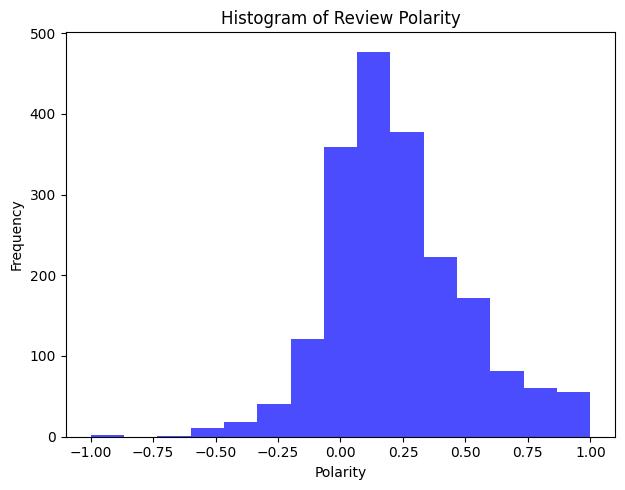

In [171]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df_tokenized['review_polarity'], bins=15, color='blue', alpha=0.7)
plt.title('Histogram of Review Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

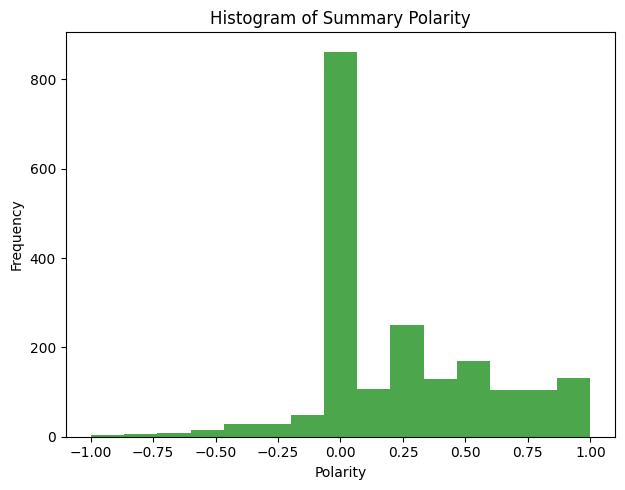

In [173]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.hist(df_tokenized['summary_polarity'], bins=15, color='green', alpha=0.7)
plt.title('Histogram of Summary Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 6. Identify top 20 positive and negative reviews and summaries respectively

In [179]:
# Sort the DataFrame by review polarity to identify top negative and positive reviews
sorted_reviews = df_tokenized.sort_values(by=['review_polarity'], ascending=True)

# Top 20 negative reviews
top_negative_reviews = sorted_reviews.head(20)[['review', 'review_polarity']]

# Top 20 positive reviews
top_positive_reviews = sorted_reviews.tail(20)[['review', 'review_polarity']]

# Print the top negative reviews
print(top_negative_reviews)

# If you also want to print the positive reviews
print(top_positive_reviews)

                                                 review  review_polarity
208   [booo, unles, you, are, patient, know, how, to...        -1.000000
182            [incomplete, kit!, very, disappointing!]        -0.975000
989   [if, you,, like, me,, used, to, play, d&d,, bu...        -0.625000
1804  [i'm, sorry., i, just, find, this, product, to...        -0.583333
364   [one, of, my, staff, will, be, using, this, ga...        -0.550000
1829                     [scrabble, in, a, card, game!]        -0.500000
227   [this, was, a, gift, for, my, daughter., i, fo...        -0.500000
803                         [this, game, is, a, blast!]        -0.500000
290        [instructions, are, complicated, to, follow]        -0.500000
301                                         [difficult]        -0.500000
1524                  [expensive, for, what, you, get.]        -0.500000
117   [i, bought, this, as, a, christmas, gift, for,...        -0.500000
230              [i, found, the, directions, diffic

In [182]:
# Sort the DataFrame by summary polarity to identify top negative and positive summaries
sorted_summaries = df_tokenized.sort_values(by=['summary_polarity'], ascending=True)

# Top 20 negative summaries
top_negative_summaries = sorted_summaries.head(20)[['summary', 'summary_polarity']]

# Top 20 positive summaries
top_positive_summaries = sorted_summaries.tail(20)[['summary', 'summary_polarity']]

# Print the top negative summaries
print(top_negative_summaries)

# Print the top positive summaries
print(top_positive_summaries)

                                                summary  summary_polarity
829                                            [boring]            -1.000
21                [the, worst, value, i've, ever, seen]            -1.000
208   [boring, unless, you, are, a, craft, person, w...            -1.000
1166  [before, this, i, hated, running, any, rpg, ca...            -0.900
1     [another, worthless, dungeon, master's, screen...            -0.800
1620                                     [disappointed]            -0.750
144                                      [disappointed]            -0.750
793                                      [disappointed]            -0.750
631                                     [disappointed.]            -0.750
363   [promotes, anger, instead, of, teaching, calmi...            -0.700
885   [too, bad,, this, is, not, what, i, was, expec...            -0.700
890                 [bad, quality-all, made, of, paper]            -0.700
178   [at, age, 31, i, found, these, v